In [1]:
import pandas as pd

# Load dataset
file_path = "Superstore_dataset.csv"  # Replace with your dataset path
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [3]:
# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


            Row ID   Postal Code         Sales
count  9800.000000   9789.000000   9800.000000
mean   4900.500000  55273.322403    230.769059
std    2829.160653  32041.223413    626.651875
min       1.000000   1040.000000      0.444000
25%    2450.750000  23223.000000     17.248000
50%    4900.500000  58103.000000     54.490000
75%    7350.250000  90008.000000    210.605000
max    9800.000000  99301.000000  22638.480000
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [5]:
# List of unnecessary columns to drop
columns_to_drop = ["Row ID", "Order ID", "Customer ID", "Postal Code", "Product ID"]

# Drop the unnecessary columns
data_cleaned = data.drop(columns=columns_to_drop)

# Display the cleaned dataset
print("Columns after cleaning:")
print(data_cleaned.columns)

# Save the cleaned dataset (optional)
data_cleaned.to_csv("cleaned_dataset.csv", index=False)

Columns after cleaning:
Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')


In [7]:
revenue_by_category = data.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(revenue_by_category)


Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64


In [14]:
# Handle mixed date formats
data_cleaned['Order Date'] = pd.to_datetime(data_cleaned['Order Date'], dayfirst=True, errors='coerce')

# Check for invalid dates
invalid_dates = data_cleaned[data_cleaned['Order Date'].isna()]
print("Rows with invalid dates:")
print(invalid_dates)


Rows with invalid dates:
Empty DataFrame
Columns: [Order Date, Ship Date, Ship Mode, Customer Name, Segment, Country, City, State, Region, Category, Sub-Category, Product Name, Sales]
Index: []


In [16]:
# Extract month and year
data_cleaned['Month'] = data_cleaned['Order Date'].dt.to_period('M')

# Preview the dataset
print(data_cleaned[['Order Date', 'Month']].head())


  Order Date    Month
0 2017-11-08  2017-11
1 2017-11-08  2017-11
2 2017-06-12  2017-06
3 2016-10-11  2016-10
4 2016-10-11  2016-10


In [18]:
# Group by 'Month' and calculate total sales
monthly_revenue = data_cleaned.groupby('Month')['Sales'].sum()

# Display the monthly revenue trends
print("Monthly Revenue Trends:")
print(monthly_revenue)


Monthly Revenue Trends:
Month
2015-01     14205.7070
2015-02      4519.8920
2015-03     55205.7970
2015-04     27906.8550
2015-05     23644.3030
2015-06     34322.9356
2015-07     33781.5430
2015-08     27117.5365
2015-09     81623.5268
2015-10     31453.3930
2015-11     77907.6607
2015-12     68167.0585
2016-01     18066.9576
2016-02     11951.4110
2016-03     32339.3184
2016-04     34154.4685
2016-05     29959.5305
2016-06     23599.3740
2016-07     28608.2590
2016-08     36818.3422
2016-09     63133.6060
2016-10     31011.7375
2016-11     75249.3995
2016-12     74543.6012
2017-01     18542.4910
2017-02     22978.8150
2017-03     51165.0590
2017-04     38679.7670
2017-05     56656.9080
2017-06     39724.4860
2017-07     38320.7830
2017-08     30542.2003
2017-09     69193.3909
2017-10     59583.0330
2017-11     79066.4958
2017-12     95739.1210
2018-01     43476.4740
2018-02     19920.9974
2018-03     58863.4128
2018-04     35541.9101
2018-05     43825.9822
2018-06     48190.7277
2018

C:\Users\shubh\AppData\Local\Temp\ipykernel_5284\1477337579.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette="viridis")


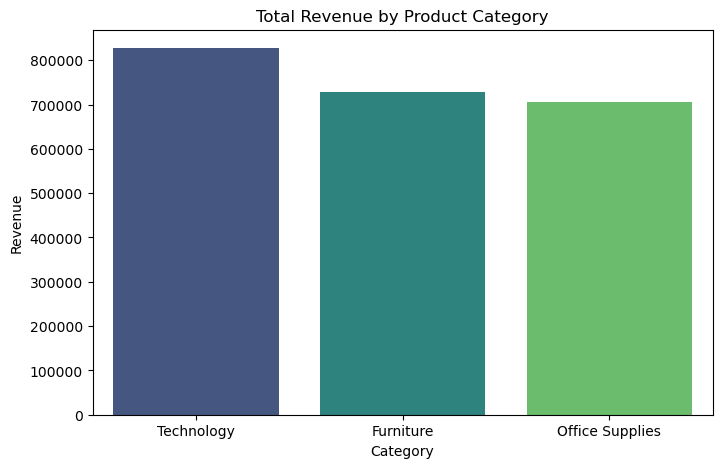

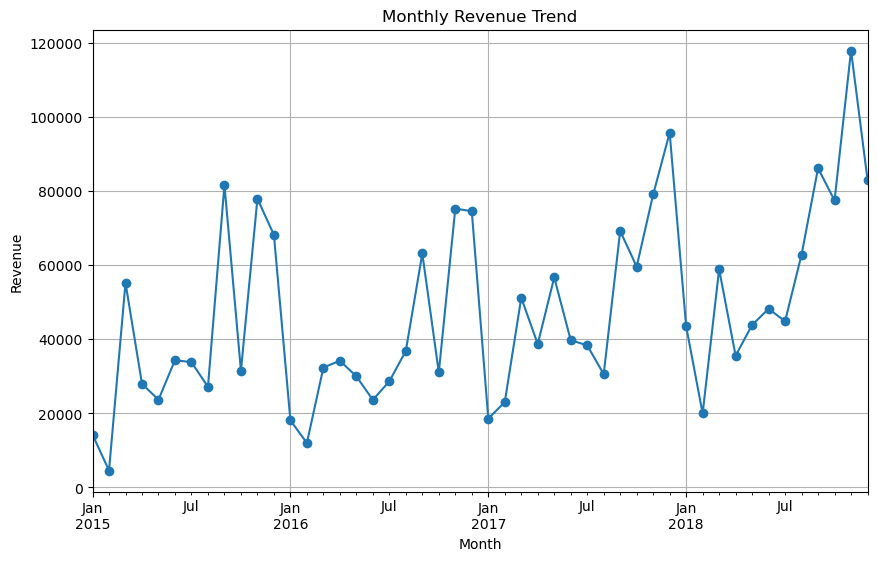

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales by category
plt.figure(figsize=(8, 5))
sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette="viridis")
plt.title("Total Revenue by Product Category")
plt.ylabel("Revenue")
plt.xlabel("Category")
plt.show()

# Monthly sales trend
monthly_revenue.plot(kind='line', figsize=(10, 6), marker='o')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.grid(True)
plt.show()


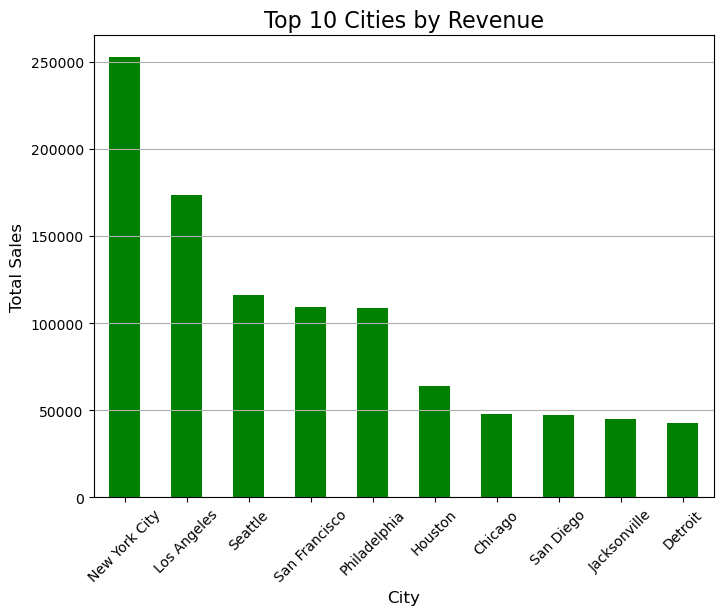

In [27]:
# Revenue by city
revenue_by_city = data_cleaned.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

# Visualization
revenue_by_city.plot(kind='bar', figsize=(8, 6), color='green')
plt.title('Top 10 Cities by Revenue', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


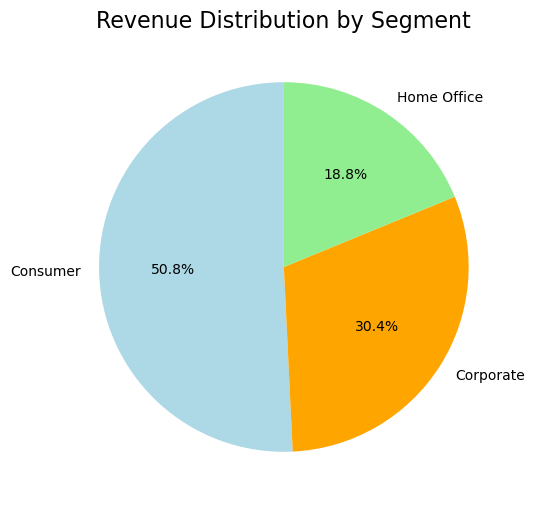

In [29]:
# Revenue by customer segment
revenue_by_segment = data_cleaned.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

# Visualization
revenue_by_segment.plot(kind='pie', figsize=(8, 6), autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange', 'lightgreen'])
plt.title('Revenue Distribution by Segment', fontsize=16)
plt.ylabel('')
plt.show()


In [55]:
print(data_cleaned.columns)

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Month', 'Year', 'YearMonth'],
      dtype='object')


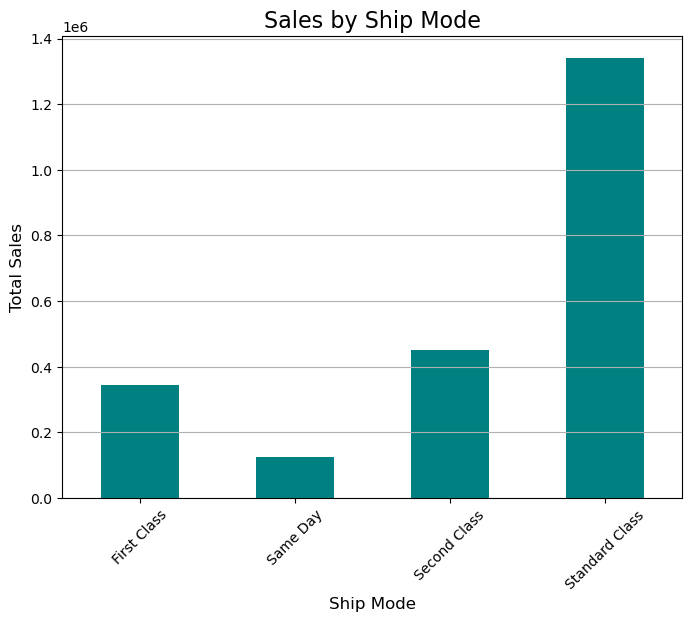

In [37]:
# Revenue by ship mode
revenue_by_ship_mode = data_cleaned.groupby('Ship Mode')['Sales'].sum()

# Visualization
revenue_by_ship_mode.plot(kind='bar', figsize=(8, 6), color='teal')
plt.title('Sales by Ship Mode', fontsize=16)
plt.xlabel('Ship Mode', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


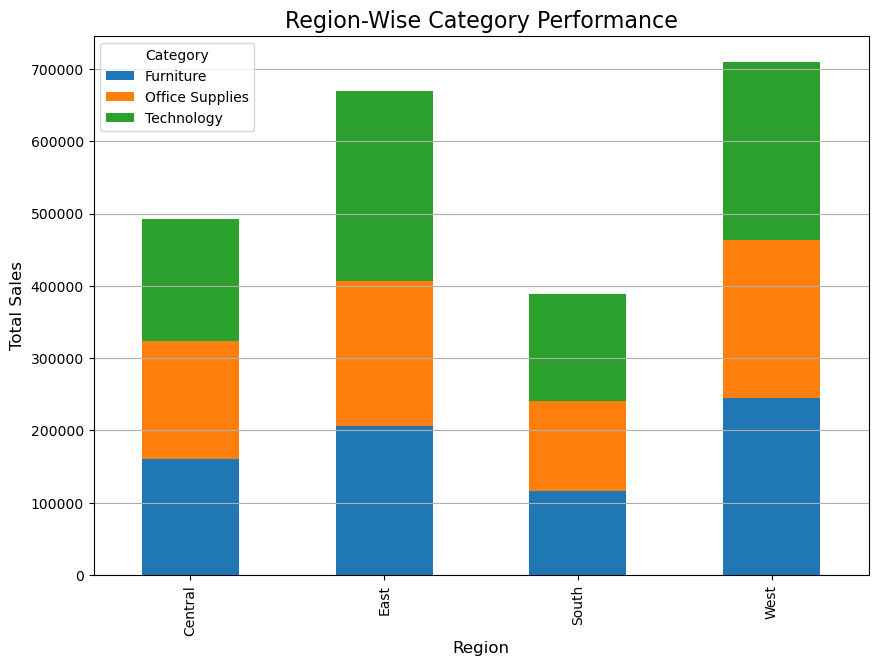

In [39]:
# Revenue by region and category
region_category_revenue = data_cleaned.groupby(['Region', 'Category'])['Sales'].sum().unstack()

# Visualization
region_category_revenue.plot(kind='bar', figsize=(10, 7), stacked=True)
plt.title('Region-Wise Category Performance', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Category')
plt.grid(axis='y')
plt.show()


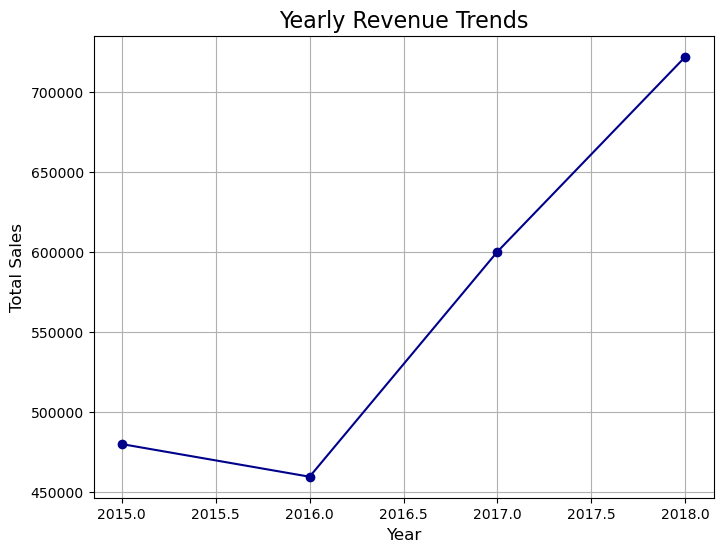

In [41]:
# Extract year from 'Order Date'
data_cleaned['Year'] = data_cleaned['Order Date'].dt.year

# Revenue by year
yearly_revenue = data_cleaned.groupby('Year')['Sales'].sum()

# Visualization
yearly_revenue.plot(kind='line', marker='o', figsize=(8, 6), color='darkblue')
plt.title('Yearly Revenue Trends', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid()
plt.show()


Top 10 Customers by Revenue:
Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


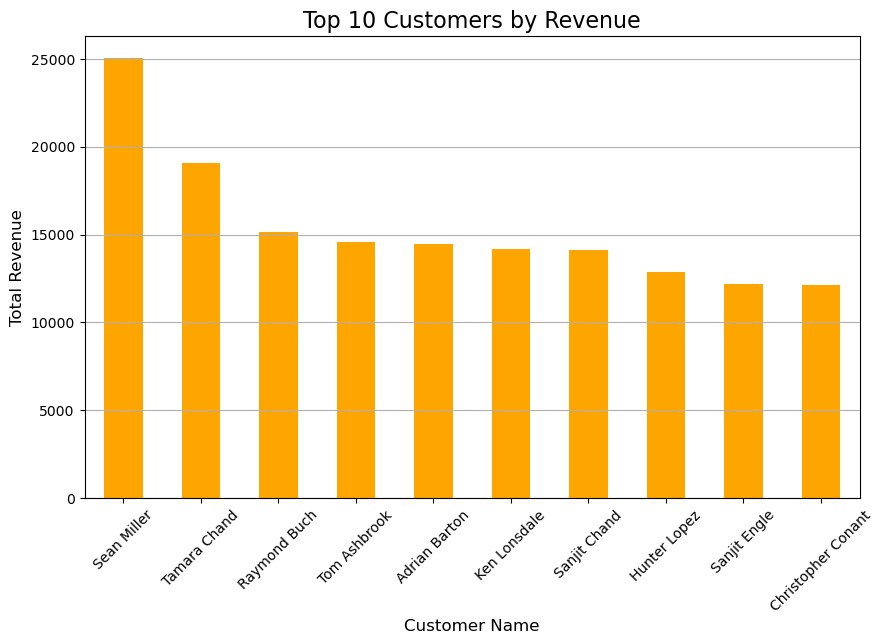

In [45]:
# Calculate total revenue per customer
clv = data_cleaned.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

# Top 10 customers by revenue
print("Top 10 Customers by Revenue:")
print(clv.head(10))

# Visualization
clv.head(10).plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Top 10 Customers by Revenue', fontsize=16)
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


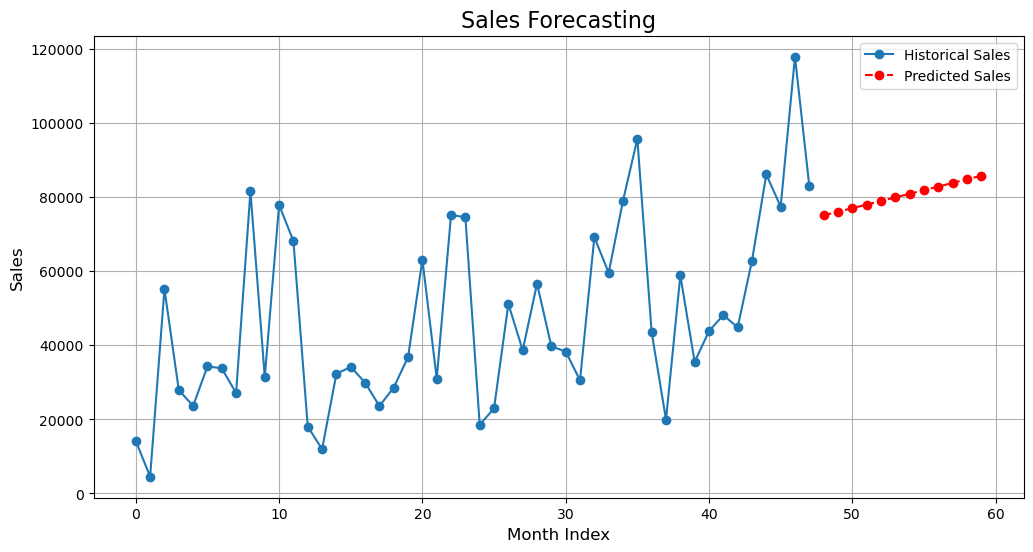

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Extract year and month as features
data_cleaned['YearMonth'] = data_cleaned['Order Date'].dt.to_period('M').astype(str)

# Aggregate monthly sales
monthly_sales = data_cleaned.groupby('YearMonth')['Sales'].sum().reset_index()
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales['YearMonth'])

# Feature engineering
monthly_sales['MonthIndex'] = range(len(monthly_sales))

# Split data into training and testing sets
X = monthly_sales[['MonthIndex']]
y = monthly_sales['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future sales
future_months = pd.DataFrame({'MonthIndex': range(len(monthly_sales), len(monthly_sales) + 12)})
future_sales = model.predict(future_months)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['MonthIndex'], monthly_sales['Sales'], label='Historical Sales', marker='o')
plt.plot(future_months['MonthIndex'], future_sales, label='Predicted Sales', linestyle='--', marker='o', color='red')
plt.title('Sales Forecasting', fontsize=16)
plt.xlabel('Month Index', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend()
plt.grid()
plt.show()
